In [2]:
import ast
import os

import cv2
import numpy as np
from tensorflow.keras.applications.densenet import preprocess_input

import keras
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
INPUT_SHUFFLED_DIR = '/mnt/raid1/kaggle/shuffle-csvs/'
NUMBERS_OF_CLASSES = 340
IMAGE_SIZE = 128
BASE_SIZE = 256
VALIDATION_SIZE = 5000

In [7]:
valid_df = pd.read_csv('/mnt/raid1/kaggle/shuffle-csvs/train_k99.csv.gz')
valid_df

,countrycode,drawing,recognized,timestamp,word,y,cv
0,US,"[[[120, 98, 78, 62, 53, 52, 56, 99, 121, 145, ...",True,2017-03-21 15:34:39.889270,crab,81,99
1,US,"[[[13, 3, 0, 18, 23, 28, 32, 44, 51, 60, 73, 7...",True,2017-01-29 19:01:59.550630,fork,123,99
2,US,"[[[93, 102, 115, 139, 151, 153, 150], [10, 24,...",True,2017-03-19 11:44:33.450090,sweater,293,99
3,SA,"[[[75, 55, 41, 30, 11, 9, 41, 56, 83, 97, 110,...",True,2017-03-19 13:34:42.706670,blackberry,32,99
4,GB,"[[[46, 24, 13, 3, 0, 1, 12, 45, 55, 57, 54, 36...",False,2017-03-02 12:45:37.251140,lobster,173,99
5,FR,"[[[0, 47, 236], [109, 115, 118]], [[29, 86, 15...",True,2017-01-23 18:04:15.654120,bridge,41,99
6,US,"[[[0, 18, 58, 77, 91, 111, 118, 136, 159, 194,...",True,2017-01-23 13:57:28.204700,diamond,87,99
7,US,"[[[177, 145, 131, 94, 73, 52, 33, 16, 6, 1, 3,...",True,2017-03-01 14:57:57.426860,circle,70,99
8,SA,"[[[168, 163, 163, 171, 180, 192, 206, 218, 223...",False,2017-03-21 12:57:54.534910,stitches,283,99
9,KR,"[[[159, 149, 125, 71, 40, 15, 4, 0, 3, 8, 41, ...",True,2017-03-02 12:15:38.390040,megaphone,179,99


In [4]:
def draw_image(raw_strokes, size=256, line_width=6, time_color=True):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0])-1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                         (stroke[0][i + 1], stroke[1][i + 1]), color, line_width)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

In [5]:
def image_generator(batch_size, ks):
    while True:
        for k in np.random.permutation(ks):
            filename = os.path.join(
                INPUT_SHUFFLED_DIR, 'train_k{}.csv.gz'.format(k))
            for df in pd.read_csv(filename, chunksize=batch_size):
                df['drawing'] = df['drawing'].apply(ast.literal_eval)
                x = np.zeros((len(df), IMAGE_SIZE, IMAGE_SIZE, 1))
                for i, raw_strokes in enumerate(df.drawing.values):
                    x[i, :, :, 0] = draw_image(raw_strokes, size=IMAGE_SIZE)
                # x = preprocess_input(x).astype(np.float32)
                y = keras.utils.to_categorical(
                    df.y, num_classes=NUMBERS_OF_CLASSES)
                yield x, y

In [6]:
def df_to_image_array(df):
    df['drawing'] = df['drawing'].apply(ast.literal_eval)
    x = np.zeros((len(df), IMAGE_SIZE, IMAGE_SIZE, 1))
    for i, raw_strokes in enumerate(df.drawing.values):
        x[i, :, :, 0] = draw_image(raw_strokes, size=IMAGE_SIZE)
    # x = preprocess_input(x).astype(np.float32)
    return x

In [10]:
valid_df = pd.read_csv(os.path.join(
    INPUT_SHUFFLED_DIR, 'train_k{}.csv.gz'.format(99)), nrows=VALIDATION_SIZE)
x_valid = df_to_image_array(valid_df)
y_valid = keras.utils.to_categorical(
    valid_df.y, num_classes=NUMBERS_OF_CLASSES)
print(x_valid.shape, y_valid.shape)
print('Validation array memory {:.2f} GB'.format(x_valid.nbytes / 1024.**3))

(5000, 128, 128, 1) (5000, 340)
Validation array memory 0.61 GB


In [11]:
x_valid

array([[[[  0.],
         [  0.],
         [  0.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [128.],
         [128.],
         [128.]],

        ...,

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]]],


       [[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
      

In [12]:
y_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
train_datagen = image_generator(batch_size=100, ks=range(99))

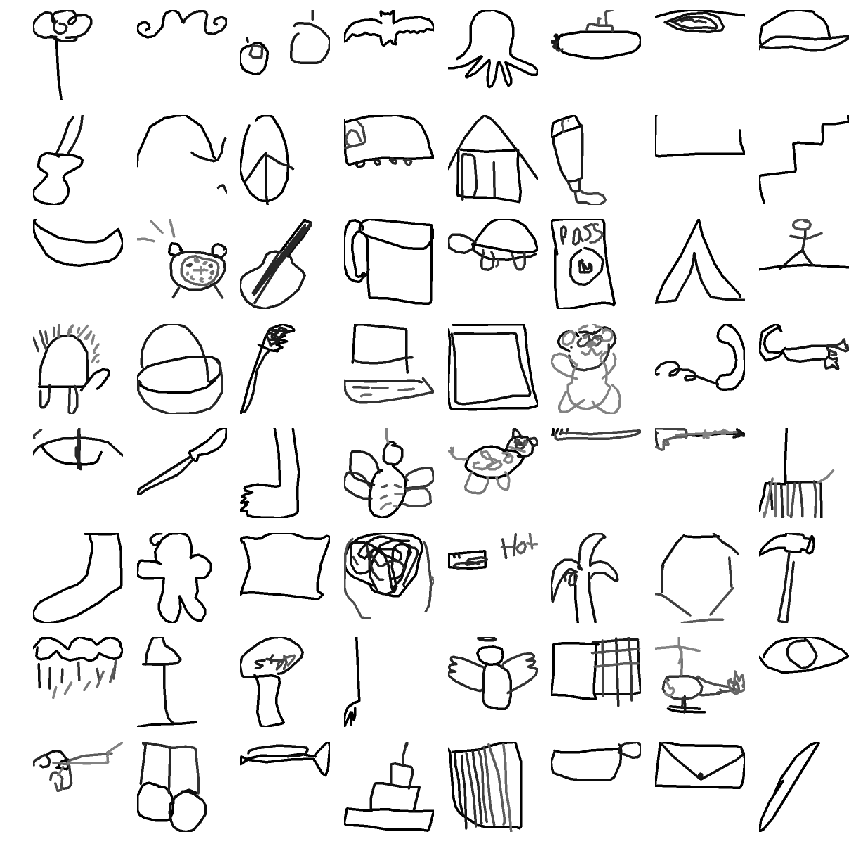

In [15]:
x, y = next(train_datagen)
n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    (-x[i]+1)/2
    ax.imshow((-x[i, :, :, 0] + 1)/2, cmap=plt.cm.gray)
    ax.axis('off')
plt.tight_layout()
fig.savefig('gs.png', dpi=300)
plt.show()